In [3]:
!pip install ta pandas numpy matplotlib scipy


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema


[*********************100%***********************]  1 of 1 completed


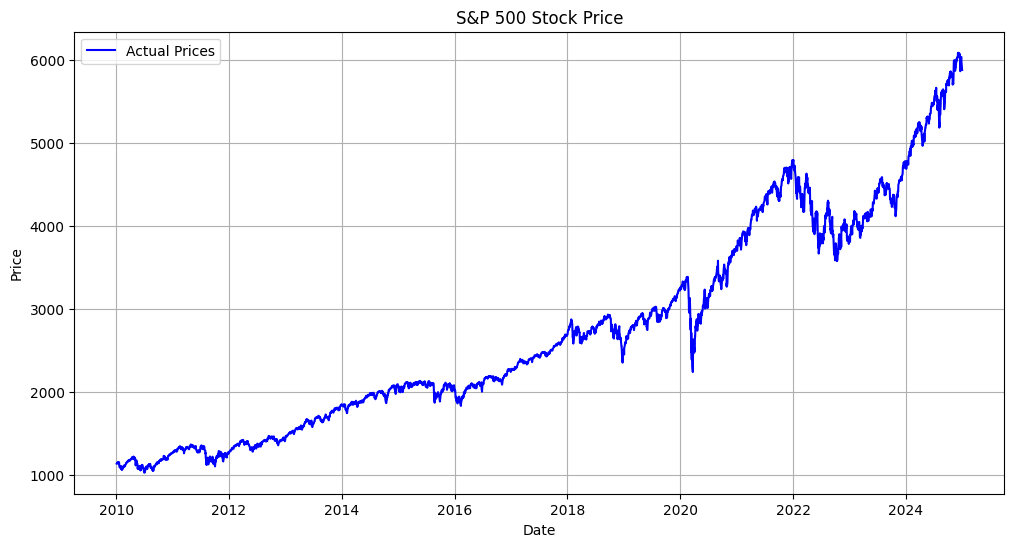

In [9]:
import yfinance as yf

# Fetch S&P 500 data
ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")

# Keep only the closing price
data = data[['Close']]
data.dropna(inplace=True)

# Plot actual price data
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Actual Prices", color='blue')
plt.title("S&P 500 Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


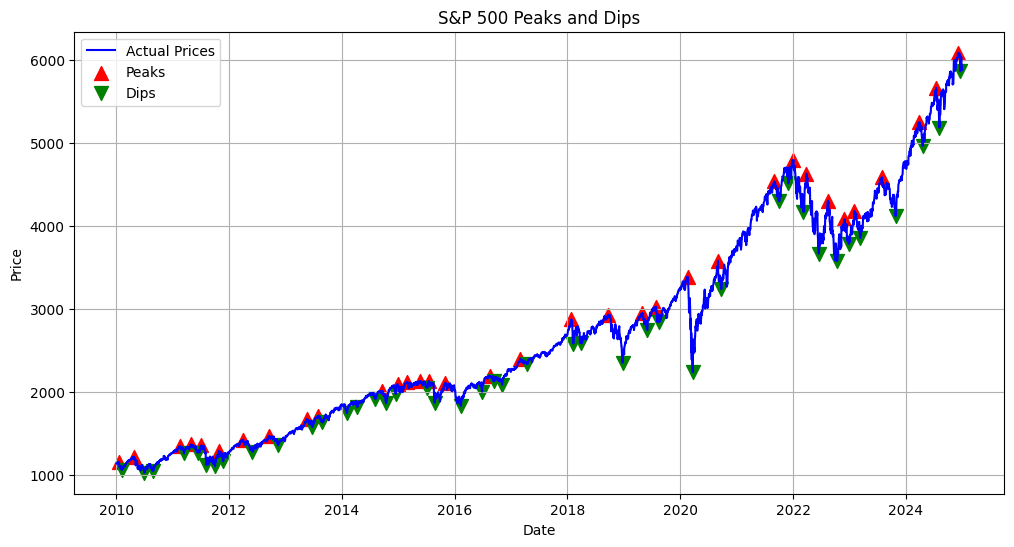

In [11]:
# Define function to find local peaks & dips
def find_peaks_dips(prices, order=10):
    local_max = argrelextrema(prices.values, np.greater, order=order)[0]
    local_min = argrelextrema(prices.values, np.less, order=order)[0]

    return local_max, local_min

# Apply function to data
peaks, dips = find_peaks_dips(data['Close'], order=30)

# Plot actual price with peaks and dips
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Actual Prices", color='blue')

# Highlight peaks in red
plt.scatter(data.iloc[peaks].index, data.iloc[peaks]['Close'], marker='^', color='red', label='Peaks', s=100)

# Highlight dips in green
plt.scatter(data.iloc[dips].index, data.iloc[dips]['Close'], marker='v', color='green', label='Dips', s=100)

plt.title("S&P 500 Peaks and Dips")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


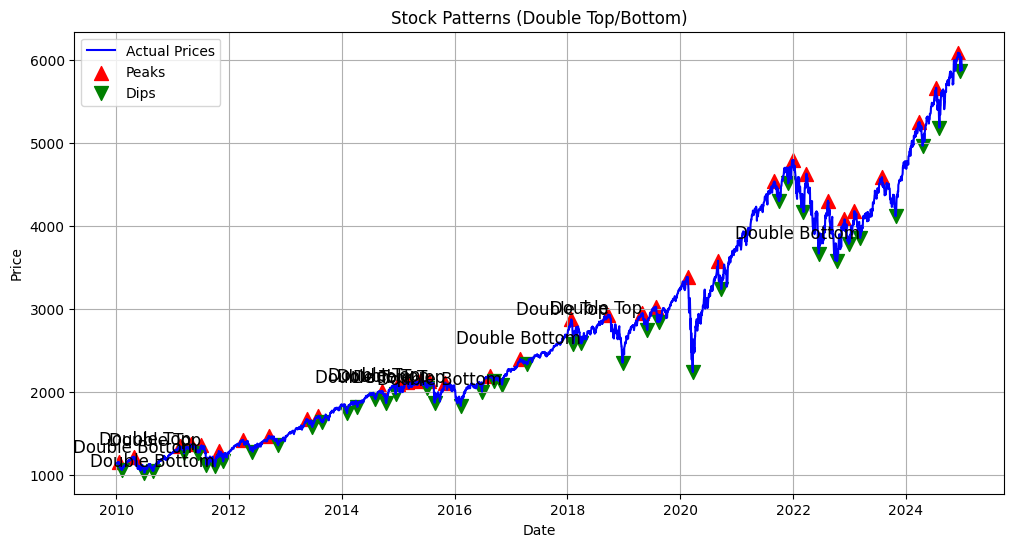

In [12]:
def detect_pattern(prices, peaks, dips):
    patterns = []

    for i in range(1, len(peaks)-1):
        left, middle, right = peaks[i-1], peaks[i], peaks[i+1]

        # Ensure values are extracted as scalars
        left_price = prices.iloc[left].item()
        middle_price = prices.iloc[middle].item()

        # **Detect "Double Top" Pattern**
        if abs(left_price - middle_price) < 0.02 * middle_price:
            patterns.append((middle, "Double Top"))

    for i in range(1, len(dips)-1):
        left, middle, right = dips[i-1], dips[i], dips[i+1]

        # Ensure values are scalars
        left_price = prices.iloc[left].item()
        middle_price = prices.iloc[middle].item()

        # **Detect "Double Bottom" Pattern**
        if abs(left_price - middle_price) < 0.02 * middle_price:
            patterns.append((middle, "Double Bottom"))

    return patterns

# Find patterns
patterns = detect_pattern(data['Close'], peaks, dips)

# Plot patterns
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label="Actual Prices", color='blue')

# Highlight peaks and dips
plt.scatter(data.iloc[peaks].index, data.iloc[peaks]['Close'], marker='^', color='red', label='Peaks', s=100)
plt.scatter(data.iloc[dips].index, data.iloc[dips]['Close'], marker='v', color='green', label='Dips', s=100)

# Label patterns
for idx, pattern in patterns:
    plt.text(data.index[idx], data.iloc[idx], pattern, fontsize=12, color='black', ha='right')

plt.title("Stock Patterns (Double Top/Bottom)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
def detect_pattern(prices, peaks, dips):
    patterns = []

    # Ensure peaks and dips are valid indices
    peaks = [p for p in peaks if p < len(prices)]
    dips = [d for d in dips if d < len(prices)]

    for i in range(1, min(len(peaks), len(dips)) - 1):
        left_peak, middle_peak, right_peak = peaks[i - 1], peaks[i], peaks[i + 1]
        left_dip, middle_dip, right_dip = dips[i - 1], dips[i], dips[i + 1]

        # Ensure indices are within bounds
        if right_peak >= len(prices) or right_dip >= len(prices):
            continue

        # **Head & Shoulders**
        if (
            float(prices.iloc[left_peak]) < float(prices.iloc[middle_peak]) and
            float(prices.iloc[right_peak]) < float(prices.iloc[middle_peak])
        ):
            patterns.append(("Head & Shoulders", middle_peak))

        # **Inverted Head & Shoulders**
        if (
            float(prices.iloc[left_dip]) > float(prices.iloc[middle_dip]) and
            float(prices.iloc[right_dip]) > float(prices.iloc[middle_dip])
        ):
            patterns.append(("Inverted H&S", middle_dip))

        # **Double Top**
        if abs(float(prices.iloc[left_peak]) - float(prices.iloc[right_peak])) < 0.02 * float(prices.iloc[left_peak]):
            patterns.append(("Double Top", middle_peak))

        # **Double Bottom**
        if abs(float(prices.iloc[left_dip]) - float(prices.iloc[right_dip])) < 0.02 * float(prices.iloc[left_dip]):
            patterns.append(("Double Bottom", middle_dip))

    return patterns

# Run the pattern detection again
patterns = detect_pattern(data['Close'], peaks, dips)

# Print detected patterns
for pattern, index in patterns:
    print(f"Detected {pattern} at index {index}")


Detected Inverted H&S at index 125
Detected Double Bottom at index 125
Detected Head & Shoulders at index 333
Detected Double Top at index 333
Detected Inverted H&S at index 441
Detected Double Top at index 1297
Detected Head & Shoulders at index 1354
Detected Double Top at index 1354
Detected Double Top at index 1394
Detected Inverted H&S at index 1204
Detected Inverted H&S at index 1537
Detected Inverted H&S at index 1723
Detected Head & Shoulders at index 3021
Detected Inverted H&S at index 2259
Detected Inverted H&S at index 2571


<ipython-input-13-3d3668587544>:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(prices.iloc[left_peak]) < float(prices.iloc[middle_peak]) and
<ipython-input-13-3d3668587544>:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(prices.iloc[right_peak]) < float(prices.iloc[middle_peak])
<ipython-input-13-3d3668587544>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(prices.iloc[left_dip]) > float(prices.iloc[middle_dip]) and
<ipython-input-13-3d3668587544>:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(prices.iloc[right_dip]) > float(prices.iloc[middle_dip])
<ipython-input

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

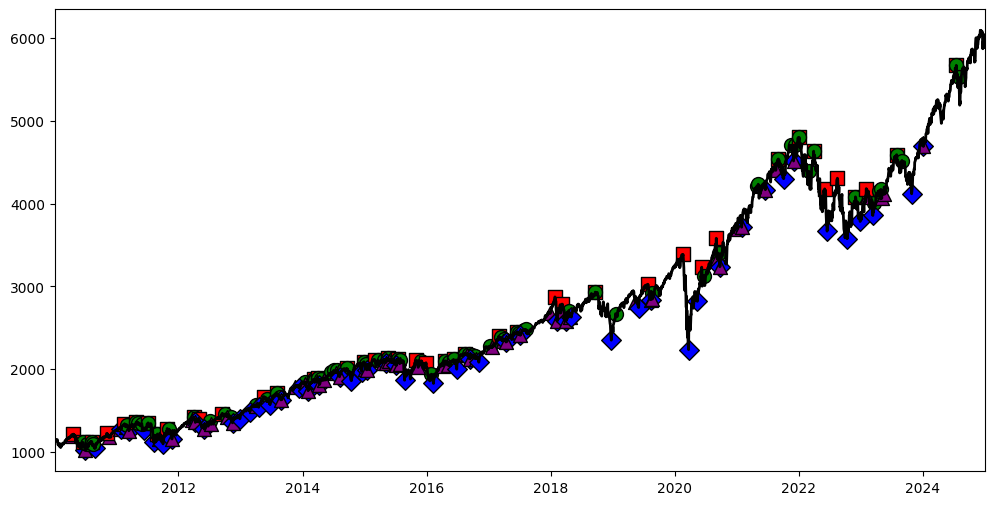

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
import yfinance as yf

# **Fetch and Prepare Data**
ticker = "^GSPC"  # S&P 500 Index
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")  # Fetch stock data

# Ensure we are using the closing price and remove NaN values
data = data[['Close']]
data.dropna(inplace=True)

# Assign prices variable (Fix the issue)
prices = data['Close']

# **Step 1: Identify Peaks and Dips**
peaks = argrelextrema(prices.values, np.greater, order=5)[0]  # Local maxima
dips = argrelextrema(prices.values, np.less, order=5)[0]  # Local minima

# **Step 2: Detect Trading Patterns**
def detect_pattern(prices, peaks, dips):
    patterns = []

    for i in range(1, min(len(peaks), len(dips)) - 1):
        left_peak, middle_peak, right_peak = peaks[i - 1], peaks[i], peaks[i + 1]
        left_dip, middle_dip, right_dip = dips[i - 1], dips[i], dips[i + 1]

        # Ensure indices are within bounds
        if right_peak >= len(prices) or right_dip >= len(prices):
            continue

        # Convert price values correctly
        left_peak_price = prices.iloc[left_peak].item()
        middle_peak_price = prices.iloc[middle_peak].item()
        right_peak_price = prices.iloc[right_peak].item()
        left_dip_price = prices.iloc[left_dip].item()
        middle_dip_price = prices.iloc[middle_dip].item()
        right_dip_price = prices.iloc[right_dip].item()

        # **Head & Shoulders**
        if left_peak_price < middle_peak_price and right_peak_price < middle_peak_price:
            patterns.append(("Head & Shoulders", middle_peak))

        # **Inverted Head & Shoulders**
        if left_dip_price > middle_dip_price and right_dip_price > middle_dip_price:
            patterns.append(("Inverted H&S", middle_dip))

        # **Double Top**
        if abs(left_peak_price - right_peak_price) < 0.02 * left_peak_price:
            patterns.append(("Double Top", middle_peak))

        # **Double Bottom**
        if abs(left_dip_price - right_dip_price) < 0.02 * left_dip_price:
            patterns.append(("Double Bottom", middle_dip))

    return patterns

# Run pattern detection
patterns = detect_pattern(prices, peaks, dips)

# **Step 3: Plot Graph with Patterns**
plt.figure(figsize=(12, 6))
plt.plot(prices, label="Actual Prices", color="black", linewidth=2)

# Define markers & colors for different patterns
pattern_symbols = {
    "Head & Shoulders": "s",   # Square
    "Inverted H&S": "D",       # Diamond
    "Double Top": "o",         # Circle
    "Double Bottom": "^",      # Triangle Up
}
pattern_colors = {
    "Head & Shoulders": "red",
    "Inverted H&S": "blue",
    "Double Top": "green",
    "Double Bottom": "purple",
}

# Plot patterns on the **actual price line**
for pattern, index in patterns:
    plt.scatter(prices.index[index], prices.iloc[index],
                marker=pattern_symbols[pattern],
                color=pattern_colors[pattern],
                label=pattern, edgecolor='black', s=100)

# **Adjust Zoom to Focus on Actual Price Movement**
plt.xlim(prices.index[0], prices.index[-1])
plt.ylim(prices.min() * 0.95, prices.max() * 1.05)

# **Add Unique Legend**
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), loc="upper left")

plt.title("Stock Price Patterns Detection (Zoomed on Actual Prices)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid()
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

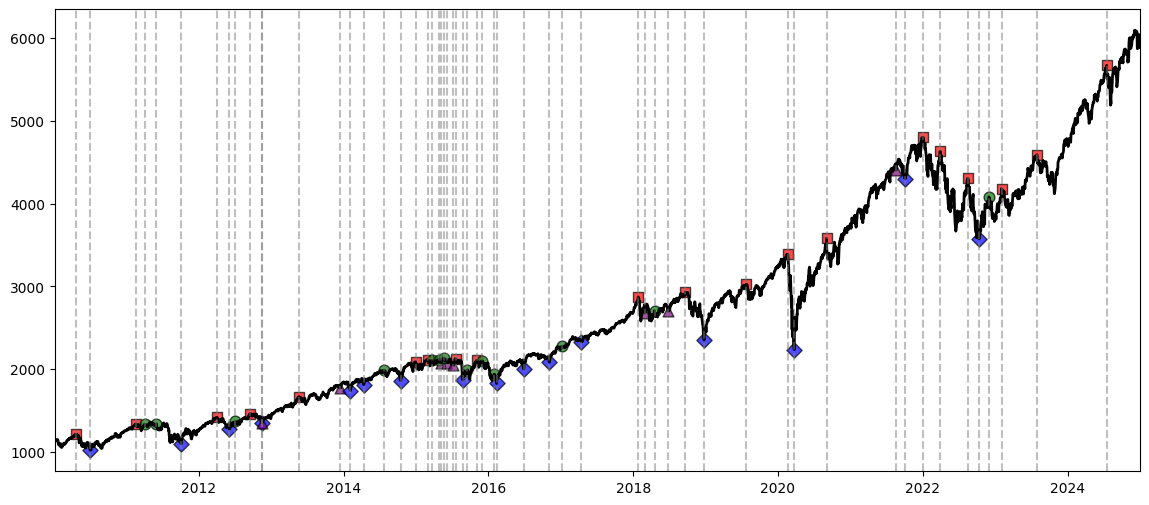

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema

# **Step 1: Identify Peaks and Dips**
peaks = argrelextrema(prices.values, np.greater, order=10)[0]  # Local maxima
dips = argrelextrema(prices.values, np.less, order=10)[0]  # Local minima

# **Step 2: Detect Trading Patterns**
def detect_pattern(prices, peaks, dips):
    patterns = []

    for i in range(1, min(len(peaks), len(dips)) - 1):
        left_peak, middle_peak, right_peak = peaks[i - 1], peaks[i], peaks[i + 1]
        left_dip, middle_dip, right_dip = dips[i - 1], dips[i], dips[i + 1]

        # Ensure indices are within bounds
        if right_peak >= len(prices) or right_dip >= len(prices):
            continue

        # Convert price values correctly
        left_peak_price = prices.iloc[left_peak].item()
        middle_peak_price = prices.iloc[middle_peak].item()
        right_peak_price = prices.iloc[right_peak].item()
        left_dip_price = prices.iloc[left_dip].item()
        middle_dip_price = prices.iloc[middle_dip].item()
        right_dip_price = prices.iloc[right_dip].item()

        # **Head & Shoulders**
        if left_peak_price < middle_peak_price and right_peak_price < middle_peak_price:
            patterns.append(("Head & Shoulders", middle_peak))

        # **Inverted Head & Shoulders**
        if left_dip_price > middle_dip_price and right_dip_price > middle_dip_price:
            patterns.append(("Inverted H&S", middle_dip))

        # **Double Top**
        if abs(left_peak_price - right_peak_price) < 0.02 * left_peak_price:
            patterns.append(("Double Top", middle_peak))

        # **Double Bottom**
        if abs(left_dip_price - right_dip_price) < 0.02 * left_dip_price:
            patterns.append(("Double Bottom", middle_dip))

    return patterns

# Run pattern detection
patterns = detect_pattern(prices, peaks, dips)

# **Step 3: Plot Graph with Patterns**
plt.figure(figsize=(14, 6))
plt.plot(prices, label="Actual Prices", color="black", linewidth=2)

# Define markers & colors for different patterns
pattern_symbols = {
    "Head & Shoulders": "s",   # Square
    "Inverted H&S": "D",       # Diamond
    "Double Top": "o",         # Circle
    "Double Bottom": "^",      # Triangle Up
}
pattern_colors = {
    "Head & Shoulders": "red",
    "Inverted H&S": "blue",
    "Double Top": "green",
    "Double Bottom": "purple",
}

# Reduce clutter: Only plot significant patterns
selected_patterns = []
for pattern, index in patterns:
    if len(selected_patterns) == 0 or abs(index - selected_patterns[-1][1]) > 30:
        selected_patterns.append((pattern, index))

# Plot patterns with **smaller, transparent markers**
for pattern, index in selected_patterns:
    plt.scatter(prices.index[index], prices.iloc[index],
                marker=pattern_symbols[pattern],
                color=pattern_colors[pattern],
                label=pattern, edgecolor='black', s=60, alpha=0.7)

# **Add Dashed Trendlines to Highlight Key Areas**
for _, index in selected_patterns:
    plt.axvline(prices.index[index], linestyle="dashed", color="gray", alpha=0.5)

# **Adjust Zoom to Focus on Actual Price Movement**
plt.xlim(prices.index[0], prices.index[-1])
plt.ylim(prices.min() * 0.95, prices.max() * 1.05)

# **Add Unique Legend**
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), loc="upper left", fontsize=10)

plt.title("Stock Price Patterns Detection (Enhanced View)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True, linestyle="dotted", alpha=0.5)
plt.show()


Trying brand new approach with cnn


In [5]:
!pip install --upgrade yfinance tensorflow scikit-learn matplotlib pandas numpy
!pip install numpy==1.23.5



  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.0.2 which is incompatible.
langchain 0.3.18 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.0

Reload and Prepare Data

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Fetch S&P 500 data
ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")

# Keep only the closing price
data = data[['Close']].dropna()

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Convert data into sequences for CNN
def create_sequences(dataset, time_steps=30):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i+time_steps])
        y.append(dataset[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 30
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape for CNN (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Build and Train the CNN Model

In [2]:
# Build CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the CNN model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 26, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         106,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,233 (465.75 KB)

 Trainable params: 119,233 (465.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0097 - val_loss: 0.0043
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.0120
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0285
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 9.7955e-04 - val_loss: 0.0038
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 8.6424e-04 - val_loss: 0.0031
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.3131e-04 - val_loss: 0.0036
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


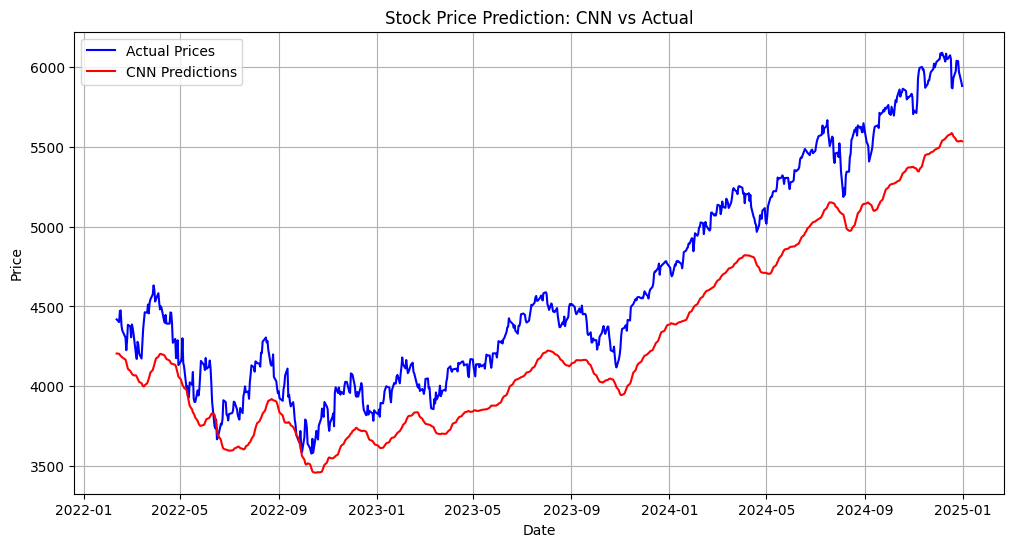

In [3]:
# Predict test data
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions_unscaled = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(data.index[train_size + time_steps:], y_test_unscaled, label="Actual Prices", color='blue')
plt.plot(data.index[train_size + time_steps:], predictions_unscaled, label="CNN Predictions", color='red')
plt.title("Stock Price Prediction: CNN vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Make Predictions and Compare with Actual Prices

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


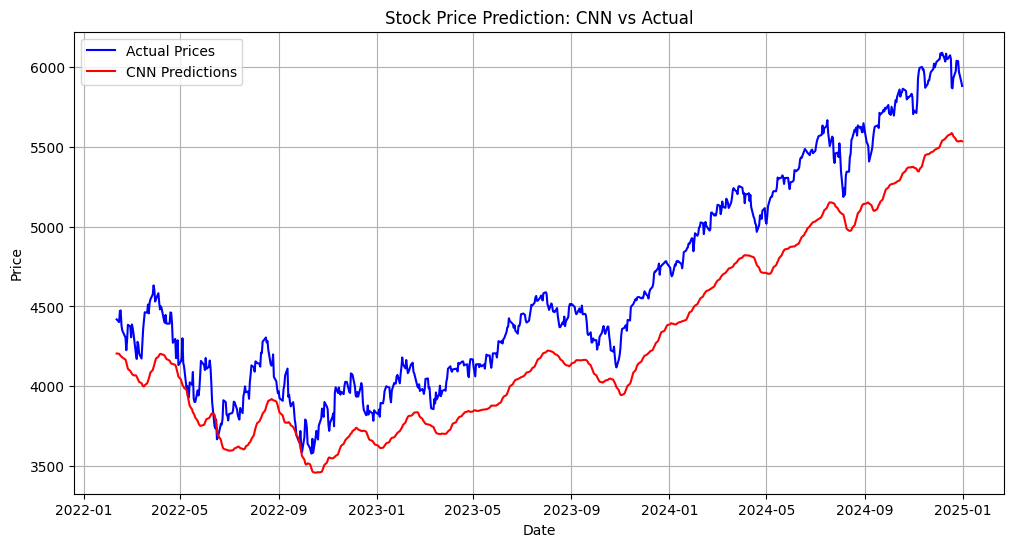

In [4]:
# Predict test data
predictions = model.predict(X_test)

# Convert predictions back to original scale
predictions_unscaled = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted stock prices
plt.figure(figsize=(12,6))
plt.plot(data.index[train_size + time_steps:], y_test_unscaled, label="Actual Prices", color='blue')
plt.plot(data.index[train_size + time_steps:], predictions_unscaled, label="CNN Predictions", color='red')
plt.title("Stock Price Prediction: CNN vs Actual")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


Evaluate CNN Model Accuracy

In [5]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
print(f"✅ CNN Model RMSE: {rmse:.2f}")


✅ CNN Model RMSE: 357.96


Visualizing Patterns on Actual and CNN Predicted Prices

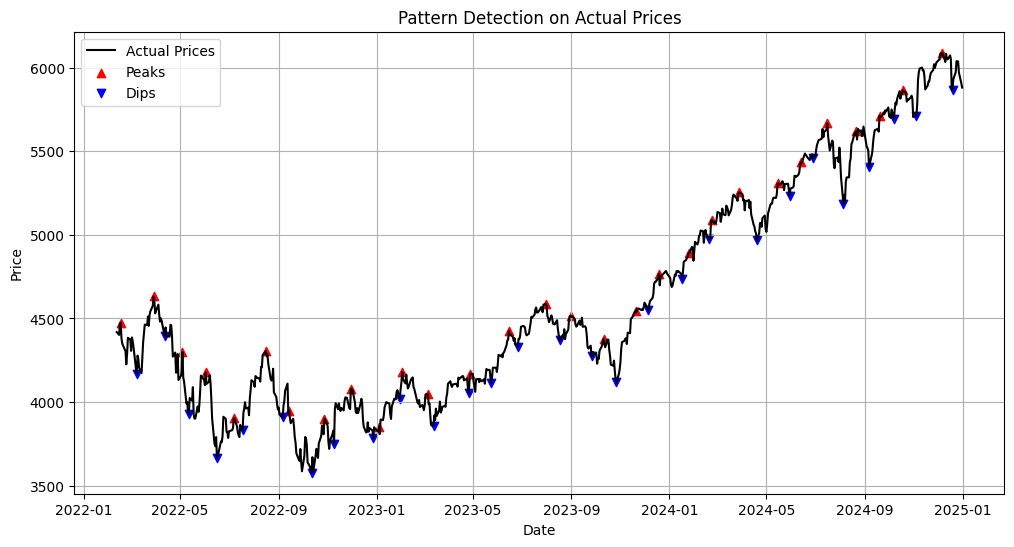

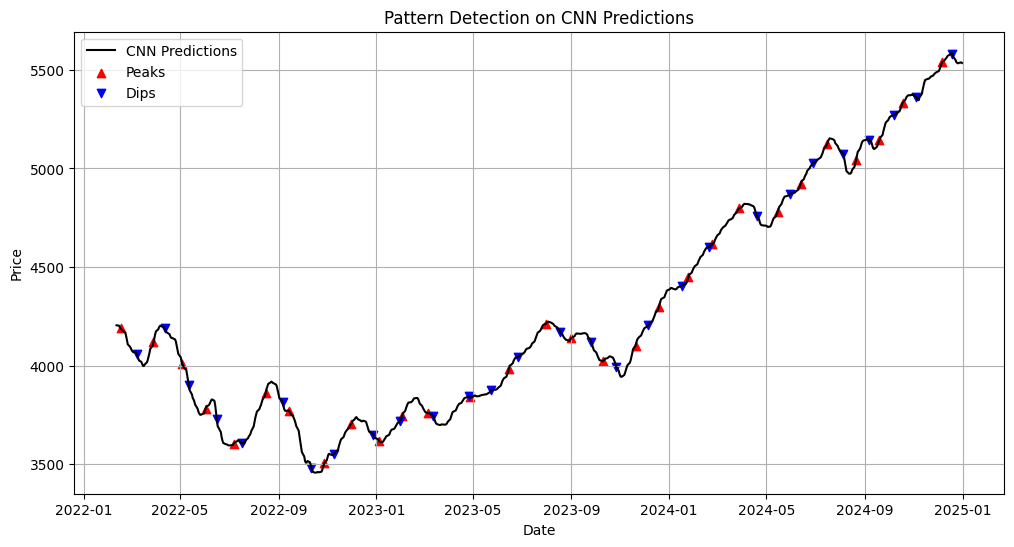

In [6]:
from scipy.signal import find_peaks

# Detect peaks and dips
peaks, _ = find_peaks(y_test_unscaled.flatten(), distance=20)
dips, _ = find_peaks(-y_test_unscaled.flatten(), distance=20)

# Plot actual prices with detected patterns
plt.figure(figsize=(12,6))
plt.plot(data.index[train_size + time_steps:], y_test_unscaled, label="Actual Prices", color='black')
plt.scatter(data.index[train_size + time_steps:][peaks], y_test_unscaled[peaks], marker='^', color='r', label="Peaks")
plt.scatter(data.index[train_size + time_steps:][dips], y_test_unscaled[dips], marker='v', color='b', label="Dips")
plt.title("Pattern Detection on Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot CNN predictions with detected patterns
plt.figure(figsize=(12,6))
plt.plot(data.index[train_size + time_steps:], predictions_unscaled, label="CNN Predictions", color='black')
plt.scatter(data.index[train_size + time_steps:][peaks], predictions_unscaled[peaks], marker='^', color='r', label="Peaks")
plt.scatter(data.index[train_size + time_steps:][dips], predictions_unscaled[dips], marker='v', color='b', label="Dips")
plt.title("Pattern Detection on CNN Predictions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0511
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0304
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0236
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0214
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0227
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0207
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0206
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0201
Epoch 16/50
94/94 ━

<ipython-input-21-e0099b2741ce>:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left_peak_price, middle_peak_price, right_peak_price = prices[left_peak], prices[middle_peak], prices[right_peak]
<ipython-input-21-e0099b2741ce>:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left_dip_price, middle_dip_price, right_dip_price = prices[left_dip], prices[middle_dip], prices[right_dip]


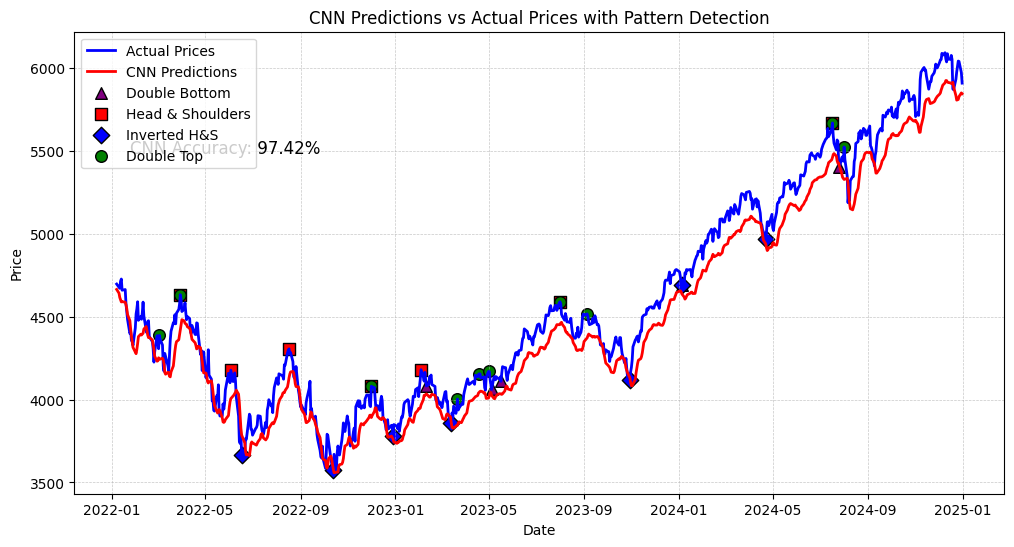

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.signal import argrelextrema
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_absolute_error

# Fetch S&P 500 data
ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2025-01-01")
data = data[['Close']].dropna()

# Normalize data for CNN
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# **Create CNN Dataset**
def create_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30
X, y = create_dataset(scaled_data, time_step)

# Reshape for CNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# **Split Data (80% Train, 20% Test)**
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# **Define CNN Model**
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mean_absolute_error')

# **Train Model**
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# **Make Predictions**
y_pred_scaled = cnn_model.predict(X_test)

# Convert back to original prices
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# **Calculate Accuracy**
cnn_mae = mean_absolute_error(y_test_actual, y_pred)
cnn_accuracy = max(0, 100 - (cnn_mae / np.mean(y_test_actual) * 100))

# **Step 2: Identify Peaks and Dips**
prices = pd.Series(y_test_actual.flatten(), index=data.index[-len(y_test_actual):])
peaks = argrelextrema(prices.values, np.greater, order=5)[0]
dips = argrelextrema(prices.values, np.less, order=5)[0]

# **Step 3: Detect Trading Patterns**
def detect_pattern(prices, peaks, dips):
    patterns = []
    for i in range(1, min(len(peaks), len(dips)) - 1):
        left_peak, middle_peak, right_peak = peaks[i - 1], peaks[i], peaks[i + 1]
        left_dip, middle_dip, right_dip = dips[i - 1], dips[i], dips[i + 1]

        if right_peak >= len(prices) or right_dip >= len(prices):
            continue

        left_peak_price, middle_peak_price, right_peak_price = prices[left_peak], prices[middle_peak], prices[right_peak]
        left_dip_price, middle_dip_price, right_dip_price = prices[left_dip], prices[middle_dip], prices[right_dip]

        if left_peak_price < middle_peak_price and right_peak_price < middle_peak_price:
            patterns.append(("Head & Shoulders", middle_peak))
        if left_dip_price > middle_dip_price and right_dip_price > middle_dip_price:
            patterns.append(("Inverted H&S", middle_dip))
        if abs(left_peak_price - right_peak_price) < 0.02 * left_peak_price:
            patterns.append(("Double Top", middle_peak))
        if abs(left_dip_price - right_dip_price) < 0.02 * left_dip_price:
            patterns.append(("Double Bottom", middle_dip))

    return patterns

# **Run pattern detection**
patterns = detect_pattern(prices, peaks, dips)

# **Step 4: Plot CNN Predictions with Patterns**
plt.figure(figsize=(12,6))
plt.plot(prices.index, prices, label="Actual Prices", color='blue', linewidth=2)
plt.plot(prices.index, y_pred.flatten(), label="CNN Predictions", color='red', linewidth=2)

# **Pattern Symbols**
pattern_styles = {
    "Double Bottom": ('^', 'purple'),
    "Head & Shoulders": ('s', 'red'),
    "Inverted H&S": ('D', 'blue'),
    "Double Top": ('o', 'green'),
}

# **Plot patterns on CNN Predictions**
for pattern, (symbol, color) in pattern_styles.items():
    pattern_indices = [idx for pat, idx in patterns if pat == pattern]
    plt.scatter(prices.index[pattern_indices], prices.iloc[pattern_indices],
                label=pattern, marker=symbol, color=color, s=70, edgecolors='black')

# **Show CNN Accuracy**
plt.text(prices.index[10], prices.max() * 0.9, f"CNN Accuracy: {cnn_accuracy:.2f}%", fontsize=12, color='black')

# **Finalize the Plot**
plt.title("CNN Predictions vs Actual Prices with Pattern Detection")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()
